<a href="https://colab.research.google.com/github/yohanesnuwara/pyreservoir/blob/master/notebooks/gas_mbal_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 603 (delta 74), reused 0 (delta 0), pack-reused 460
Receiving objects: 100% (603/603), 1.31 MiB | 9.36 MiB/s, done.
Resolving deltas: 100% (316/316), done.


## MBAL 1: Water-driven dry-gas reservoir

U.S. Gulf Coast gas reservoir

In [2]:
import sys
sys.path.append('/content/pyreservoir/matbal')

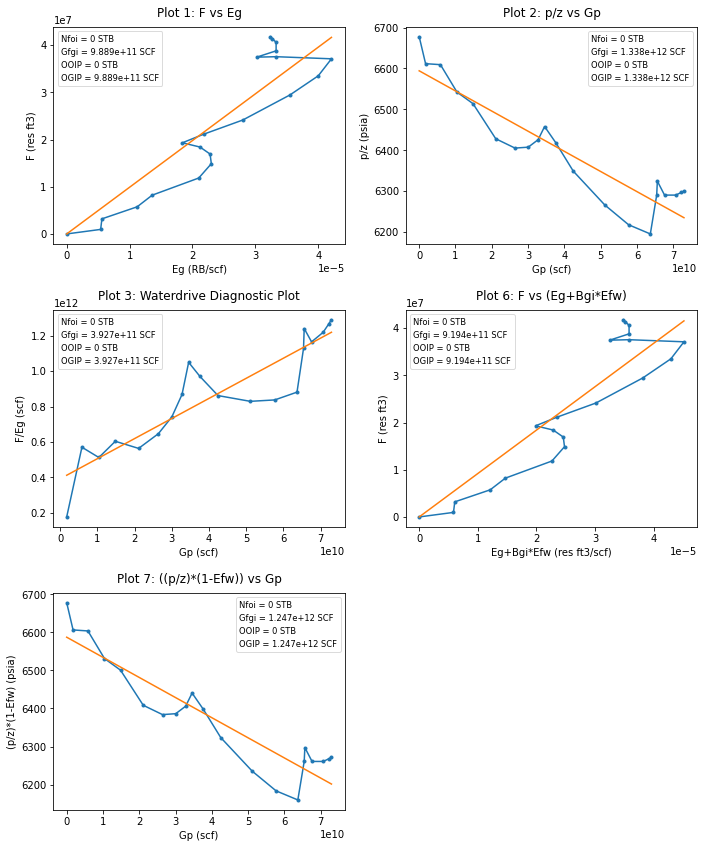

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mbal import drygas

# ignore warning caused by division with zero
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# known data
cf = 3.5E-6 # Formation compressibility, sip
cw = 2.9E-6 # Fluid compressibility, sip
swi = 0.21

# load data
df = pd.read_csv('/content/pyreservoir/data/dry_gas_with_waterdrive.csv')

# define variables
p = df['p'].values
Bg = df['Bg'].values * (1 / 1E+3) # convert to res ft3/scf
Gp = df['Gp'].values * 1E+6 # convert to scf
z = df['z'].values

# initialize with type of reservoir: dry-gas
type = drygas()

# calculate MBAL parameters
F, Btg, Efw, Eg = drygas.calculate_params(type, p, Bg, Gp, cf, cw, swi)

# plot MBAL
plt.figure(figsize=(10,12)) # define the figure size
F, Eg, Efw = drygas.plot(type, p, z, Gp, F, Btg, Efw, Eg)


## MBAL 2: Overpressured dry-gas reservoir

Offshore Louisiana Gas reservoir 

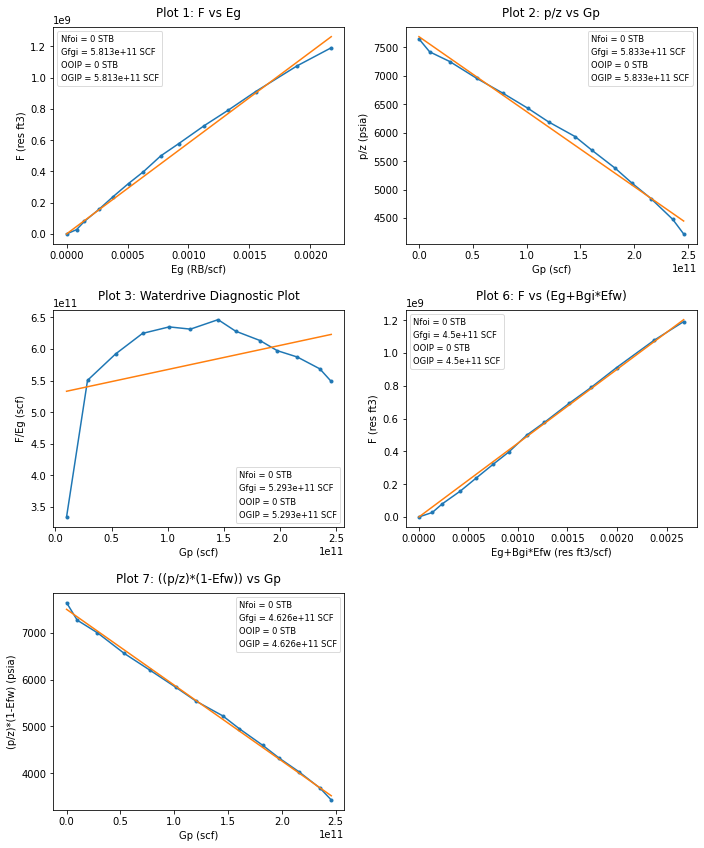

In [4]:
# known data
cf = 19.5E-6 # Formation compressibility, sip
cw = 3E-6 # Fluid compressibility, sip
swi = 0.22

# load data
columns = ['date', 'p', 'z', 'Gp', 'Bg']
df = pd.read_csv('/content/pyreservoir/data/dry_gas_with_overpressure.csv', names=columns)

# define variables
p = df['p'].values
Bg = df['Bg'].values 
Gp = df['Gp'].values * 1E+9 # convert to scf
z = df['z'].values

# initialize with type of reservoir: dry-gas
type = drygas()

# calculate MBAL parameters
F, Btg, Efw, Eg = drygas.calculate_params(type, p, Bg, Gp, cf, cw, swi)

# plot MBAL
plt.figure(figsize=(10,12)) # define the figure size
F, Eg, Efw = drygas.plot(type, p, z, Gp, F, Btg, Efw, Eg)


## MBAL 3: Water-driven Gas-Condensate Reservoir

Bacon-Lime reservoir

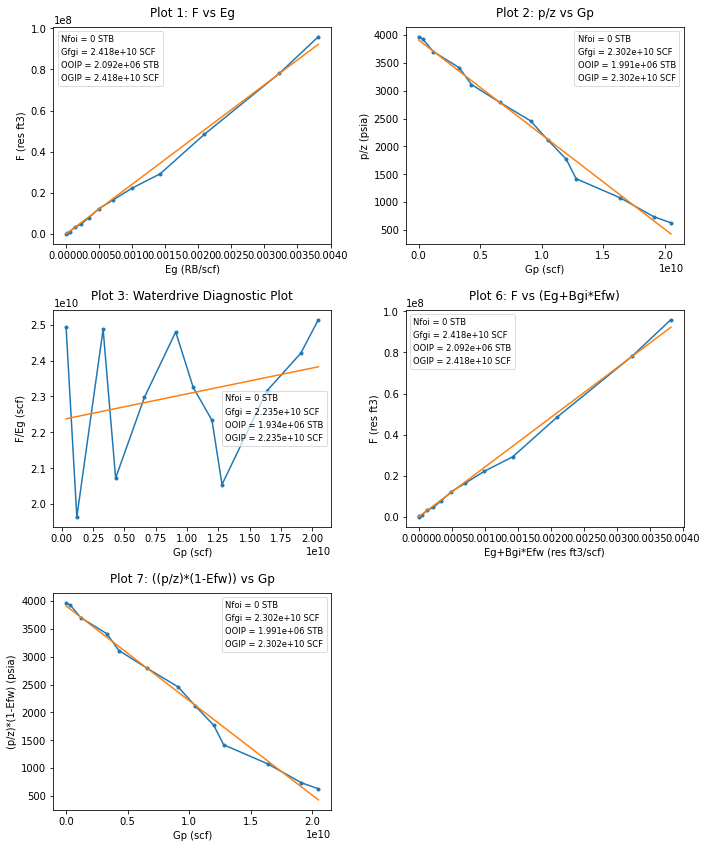

In [17]:
from mbal import gascondensate

# known data
cf = 0 # Formation compressibility, sip
cw = 0 # Fluid compressibility, sip
swi = 0
pdew = 3691 # Dew-point pressure, psi

# load data
columns = ['p', 'Np', 'Gp', 'Bg', 'Bo', 'Rs', 'Rv']
df = pd.read_csv('/content/pyreservoir/data/gas_condensate.csv', names=columns)

# define variables
p = df['p'].values
Bg = df['Bg'].values * (1 / 1E+3) # convert to res ft3/scf
Bo = df['Bo'].values 
Np = df['Np'].values
Gp = df['Gp'].values * 1E+9 # convert to scf
Gi = np.zeros(len(df)) # zeros, no gas injection for cycling
Rs = df['Rs'].values 
Rv = df['Rv'].values * (1 / 1E+6) # convert to STB/MMSCF

# no gas compressibility factor data, so produce with correlation
sys.path.append('/content/pyreservoir/pvt')
from pvtcorrelation import *

z = []
for i in range(len(p)):
  P_pc, T_pc, P_pr, T_pr = gas_pseudoprops(220, p[i], .7, .001, .001)
  prho_, z_ = gas_zfactor(T_pr, P_pr)
  z.append(z_)

# initialize with type of reservoir: gas-condensate
type = gascondensate()

# calculate MBAL parameters
F, Btg, Efw, Eg = gascondensate.calculate_params(type, p, pdew, Bg, Bo, Np, Gp, 
                                                 Gi, cf, cw, swi, Rs, Rv)
# plot MBAL
plt.figure(figsize=(10,12)) # define the figure size
F, Eg, Efw = gascondensate.plot(type, p, z, Gp, F, Btg, Efw, Eg, Rv)
